In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import os

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

In [3]:
# Load the processed data
data = pd.read_csv('../data/processed_data.csv')
question_mapping = pd.read_csv('../data/question_mapping.csv')

# Display basic information
print("Data shape:", data.shape)
print("\nFeatures:", data.columns.tolist())
print("\nQuestion mapping:")
print(question_mapping)

Data shape: (14697, 13)

Features: ['student_id', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13']

Question mapping:
   question_id                                      question_text
0           Q1       How often do you plan on doing your laundry?
1           Q2  How do you see yourself usually spending Frida...
2           Q3  How comfortable are you sharing belongings wit...
3           Q4  What kind of studying should happen in your room?
4           Q5  Which statement best describes your standards ...
5           Q6             How clean do you want your room to be?
6           Q7  How comfortable are you with any individual in...
7           Q8  How do you feel about groups of people sociali...
8           Q9  How would you describe your attitude toward sm...
9          Q10  How would you describe your attitude toward th...
10         Q11                            Dealing with conflicts:
11         Q12  How comfortable are you with adjusting your li.

In [9]:
# Separate features and IDs
X = data.drop('student_id', axis=1)
student_ids = data['student_id']

# Split the data
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Save processed data
X_train.to_csv('data/train_data.csv', index=False)
X_val.to_csv('data/val_data.csv', index=False)

print("\nData saved to data/ directory")

Training set shape: (11757, 12)
Validation set shape: (2940, 12)

Data saved to data/ directory


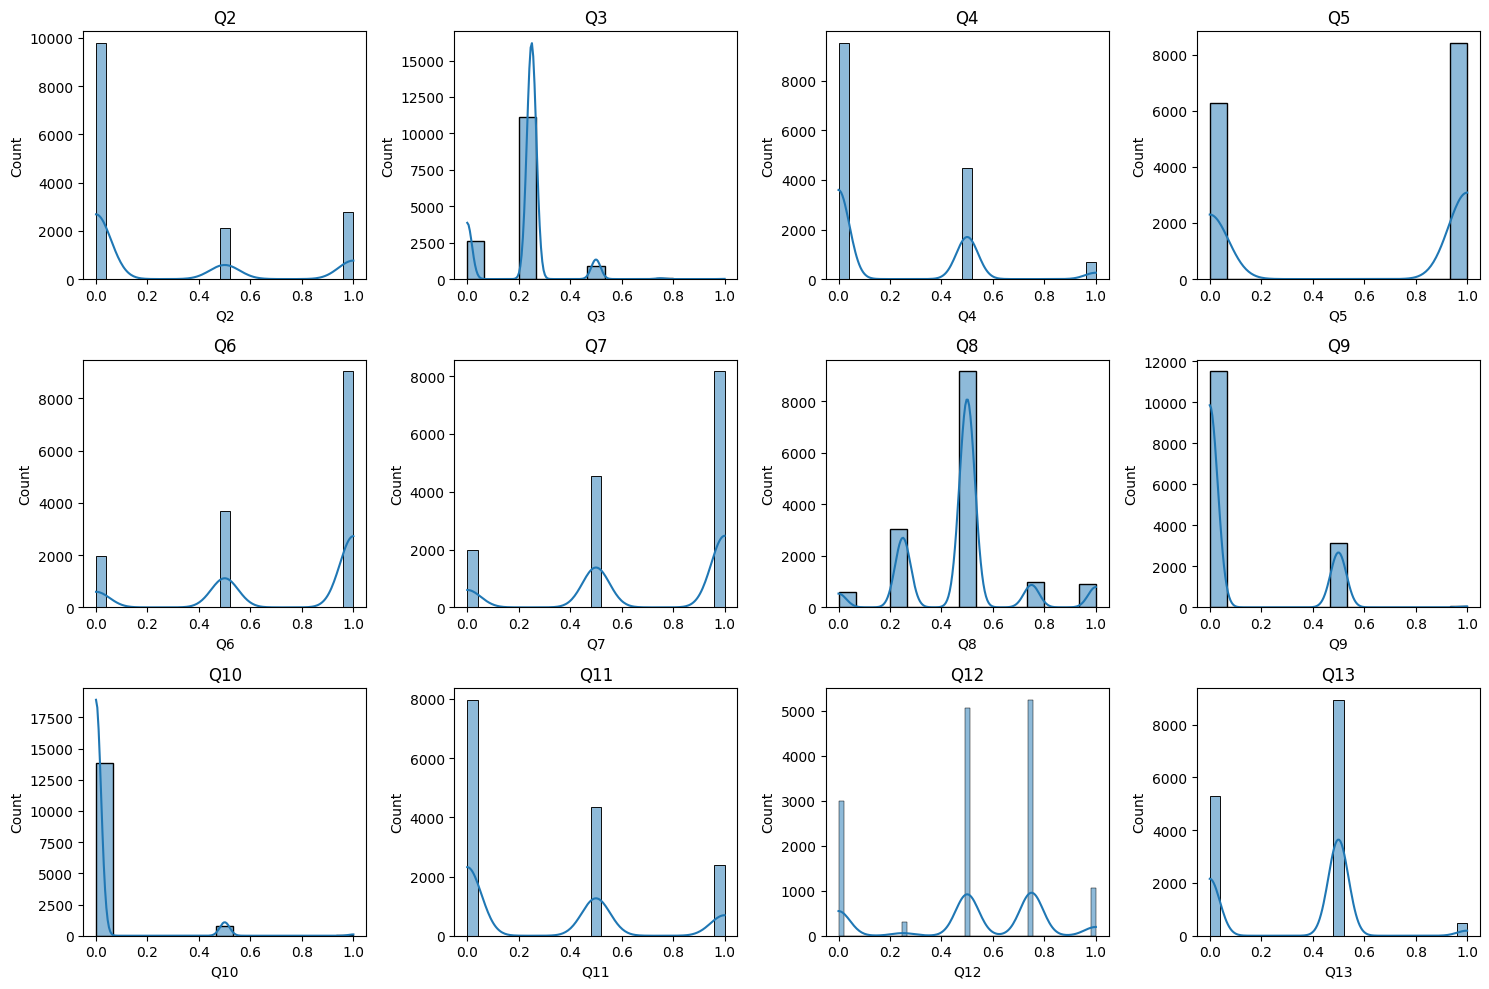

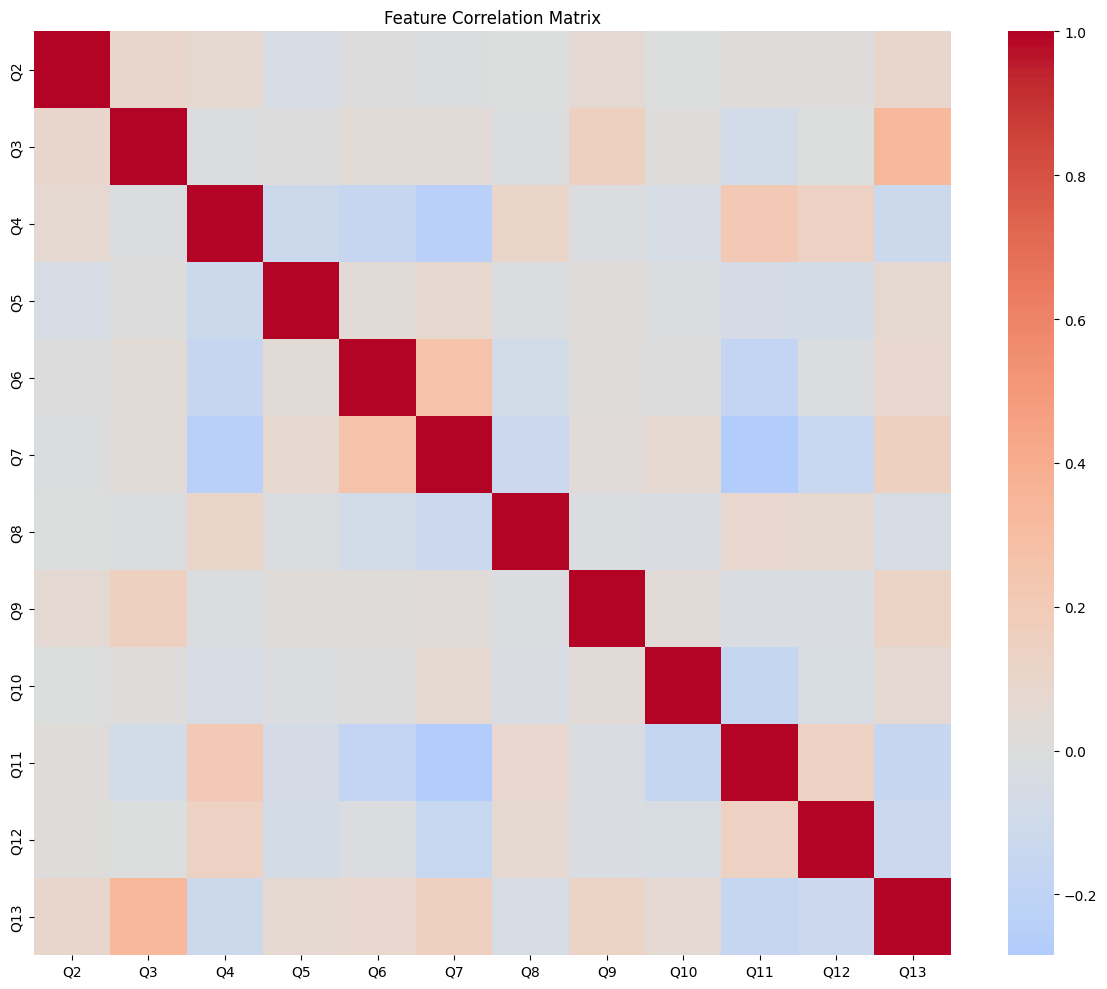

In [11]:
# Visualize feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.savefig('data/feature_distributions.png')
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('data/correlation_matrix.png')
plt.show()